In [99]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import numpy as np

In [100]:
pd.set_option('max_columns', 50)

In [101]:
df = pd.read_excel('chapter-12-relay-foods.xlsx', sheetname = 'Purchase Data - Full Study')

In [102]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [103]:
df['y-m'] = df.PickupDate.dt.strftime("%Y-%m")

In [104]:
df['year'] = df['PickupDate'].map(lambda x: x.year)
df['month'] = df['PickupDate'].map(lambda x: x.month)

In [105]:
df = df.sort_values('y-m')
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,y-m,year,month
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01,2009,1
254,270,2009-01-14,277,127.47,EZATD,2,2009-01-14,2009-01,2009,1
334,280,2009-01-20,899,12.29,WNYJY,3,2009-01-20,2009-01,2009,1
427,266,2009-01-13,3355,3.68,ACX3T,3,2009-01-13,2009-01,2009,1
97,285,2009-01-27,182,291.64,HJKAY,3,2009-01-27,2009-01,2009,1


In [106]:
df.set_index('UserId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()


,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,y-m,year,month,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009,1,2009-01
1,277,270,2009-01-14,127.47,EZATD,2,2009-01-14,2009-01,2009,1,2009-01
2,899,280,2009-01-20,12.29,WNYJY,3,2009-01-20,2009-01,2009,1,2009-01
3,3355,266,2009-01-13,3.68,ACX3T,3,2009-01-13,2009-01,2009,1,2009-01
4,182,285,2009-01-27,291.64,HJKAY,3,2009-01-27,2009-01,2009,1,2009-01


In [107]:
grouped = df.groupby(['CohortGroup', 'y-m'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'UserId': pd.Series.nunique,
                       'OrderId': pd.Series.nunique,
                       'TotalCharges': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'UserId': 'TotalUsers',
                        'OrderId': 'TotalOrders'}, inplace=True)
cohorts.head()
#grouped.head()

TotalUsers  TotalCharges  TotalOrders
CohortGroup y-m                                           
2009-01     2009-01          22      1850.255           30
            2009-02           8      1351.065           25
            2009-03          10      1357.360           26
            2009-04           9      1604.500           28
            2009-05           9      1474.535           25

In [108]:
cohorts.head()

TotalUsers  TotalCharges  TotalOrders
CohortGroup y-m                                           
2009-01     2009-01          22      1850.255           30
            2009-02           8      1351.065           25
            2009-03          10      1357.360           26
            2009-04           9      1604.500           28
            2009-05           9      1474.535           25

In [109]:
def thing(df):
    df['CohortPeriod'] = list(range(1, len(df) + 1))
    return df

In [110]:
cohorts = cohorts.groupby(level=0).apply(thing)

In [111]:
cohorts.head()

TotalUsers  TotalCharges  TotalOrders  CohortPeriod
CohortGroup y-m                                                         
2009-01     2009-01          22      1850.255           30             1
            2009-02           8      1351.065           25             2
            2009-03          10      1357.360           26             3
            2009-04           9      1604.500           28             4
            2009-05           9      1474.535           25             5

In [112]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [113]:
cohorts.head()

y-m  TotalUsers  TotalCharges  TotalOrders
CohortGroup CohortPeriod                                                
2009-01     1             2009-01          22      1850.255           30
            2             2009-02           8      1351.065           25
            3             2009-03          10      1357.360           26
            4             2009-04           9      1604.500           28
            5             2009-05           9      1474.535           25

In [114]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2009-01      1               22
             2                8
             3               10
             4                9
             5                9
Name: TotalUsers, dtype: int64

In [115]:
cgsize = cohorts['TotalUsers'].groupby(level=0).first()

In [116]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,35.0,50.0,31.0,48.0,30.0,30.0,51.0,127.0,65.0,88.0,88.0,24.0
2,8.0,3.0,4.0,16.0,13.0,15.0,25.0,12.0,18.0,20.0,35.0,19.0,55.0,31.0,NaN
3,10.0,5.0,5.0,10.0,11.0,9.0,13.0,9.0,14.0,12.0,27.0,18.0,28.0,NaN,NaN
4,9.0,1.0,4.0,13.0,6.0,6.0,10.0,7.0,8.0,13.0,27.0,7.0,NaN,NaN,NaN
5,9.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,18.0,NaN,NaN,NaN,NaN


In [117]:
percents = cohorts['TotalUsers'].unstack(0).divide(cgsize, axis=1)
percents.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.363636,0.200000,0.307692,0.457143,0.26,0.483871,0.520833,0.400000,0.600000,0.392157,0.275591,0.292308,0.625000,0.352273,NaN
3,0.454545,0.333333,0.384615,0.285714,0.22,0.290323,0.270833,0.300000,0.466667,0.235294,0.212598,0.276923,0.318182,NaN,NaN
4,0.409091,0.066667,0.307692,0.371429,0.12,0.193548,0.208333,0.233333,0.266667,0.254902,0.212598,0.107692,NaN,NaN,NaN
5,0.409091,0.266667,0.076923,0.171429,0.08,0.225806,0.229167,0.200000,0.433333,0.254902,0.141732,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.171429,0.12,0.129032,0.208333,0.300000,0.300000,0.156863,NaN,NaN,NaN,NaN,NaN
7,0.409091,0.266667,0.153846,0.142857,0.06,0.129032,0.229167,0.133333,0.266667,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.171429,0.10,0.096774,0.145833,0.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.057143,0.10,0.322581,0.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


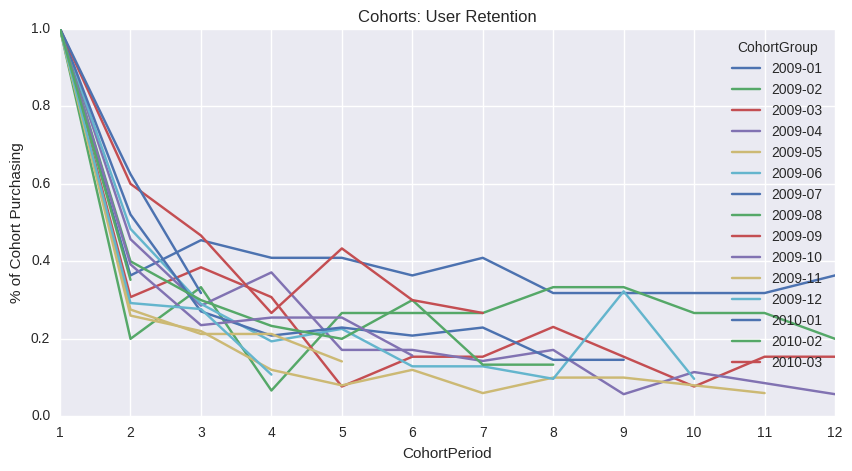

In [118]:
percents.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');